In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Importing libraries

import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('/content/drive/MyDrive/ML-Models/wqred.csv')
df = pd.DataFrame(data)

df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
dup = df.drop_duplicates()
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [67]:
dropped = dup.dropna()
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [68]:
last_col = dup.columns[-1]
X = dup.drop(last_col, axis=1)
y = dup[last_col]

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)


Shape of X:  (1359, 11)
Shape of y:  (1359,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Predicted Values')

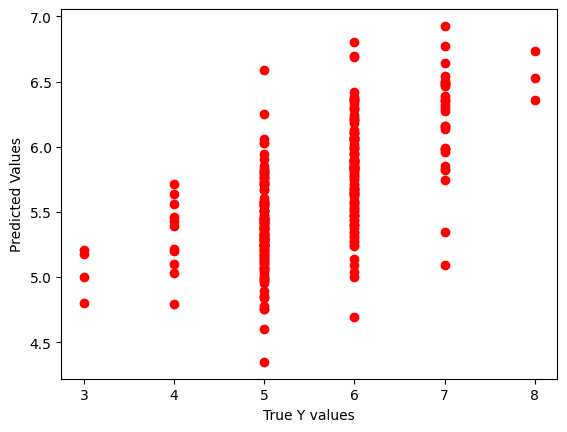

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred, c='red')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [71]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.39153604990458013
Mean Squared Error:  0.43100900509097473
Root Mean Squared Error:  0.6565127607982763
Mean Absolute Error:  0.5041409053487289


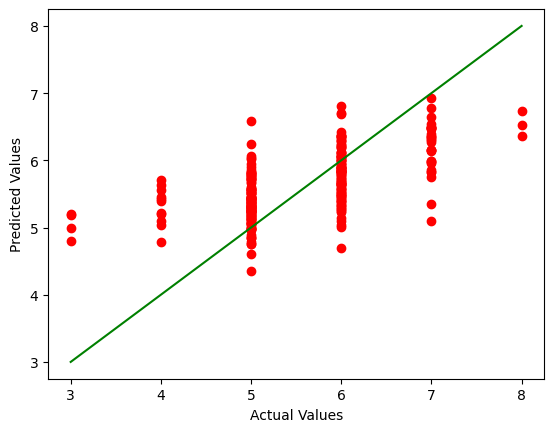

In [72]:
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()

Text(0, 0.5, 'Predicted Values')

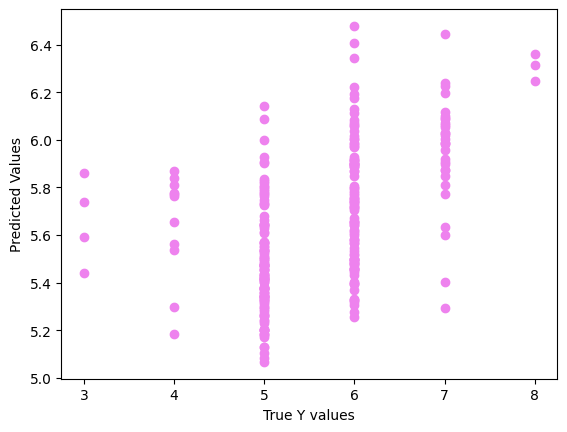

In [73]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred2 = model.predict(X_test)
plt.scatter(y_test, y_pred2, c='violet')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [74]:
r2_2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.39153604990458013
Mean Squared Error:  0.43100900509097473
Root Mean Squared Error:  0.6565127607982763
Mean Absolute Error:  0.5041409053487289


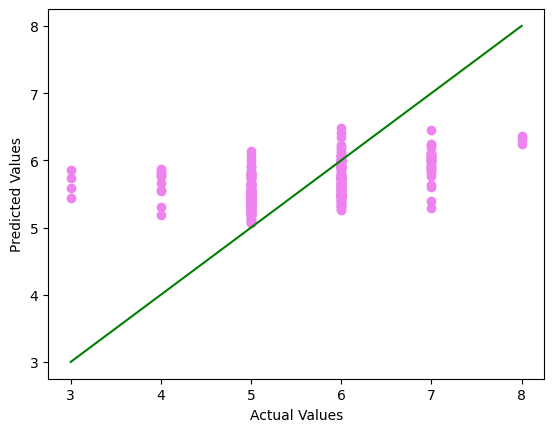

In [75]:
plt.scatter(y_test, y_pred2, c='violet')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()

Text(0, 0.5, 'Predicted Values')

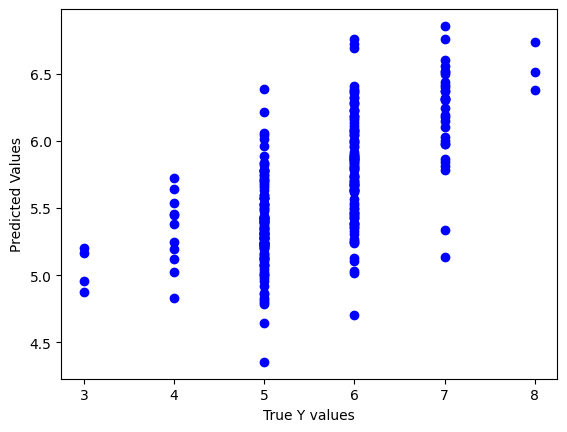

In [81]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred3 = model.predict(X_test)
plt.scatter(y_test, y_pred3, c='blue')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [77]:
r2_3 = r2_score(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = sqrt(mse)

print('R2 Score: ', r2)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

R2 Score:  0.39153604990458013
Mean Squared Error:  0.43100900509097473
Root Mean Squared Error:  0.6565127607982763
Mean Absolute Error:  0.5041409053487289


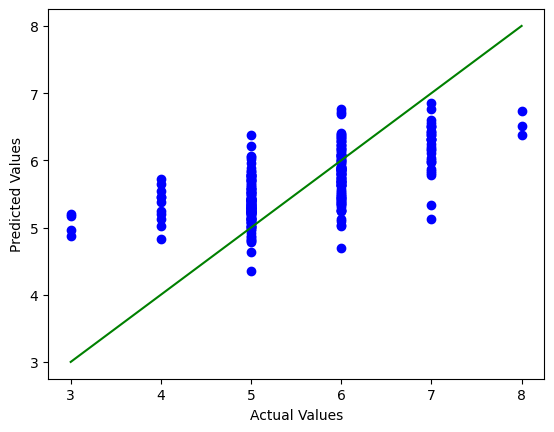

In [78]:
plt.scatter(y_test, y_pred3, c='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()

In [80]:
metricsTable = pd.DataFrame({"Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"], "R2 Score": [r2, r2_2, r2_3], "Mean Squared Error": [mse, mse2, mse3], "Mean Absolute Error": [mae, mae2, mae3], "Root Mean Squared Error": [rmse, rmse2, rmse3]})
metricsTable

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,0.391536,0.431009,0.504141,0.656513
1,Lasso Regression,0.218856,0.553328,0.575324,0.656513
2,Ridge Regression,0.398876,0.425809,0.502958,0.656513
